# practising the gradient boosting algorithm
# step to use GBA
1 create a base model
2 compute residual error
3 construct the decision tree consider inputs x1 and R1
4 once model is trained compute prediction and adjust the learning rate


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

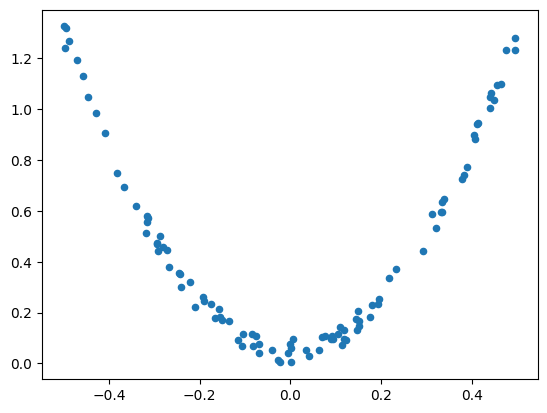

In [18]:
# step 1
data=100
X=np.random.rand(data,1) - 0.5
y=5  * X[:,0] **2 + 0.1 * np.random.rand(data)
plt.scatter(X,y,s=20)

In [19]:
# step 2
# first dt 
h1=DecisionTreeRegressor(max_depth=2)
h1.fit(X,y)

DecisionTreeRegressor(max_depth=2)

In [20]:
f1=[h1] # ensembling on tree
f1_prediction=h1.predict(X)
# print(" R2 score of f1", f1_prediction)
print(r2_score(y,f1_prediction))

0.7930781611039487


In [21]:
# second dt(decision tree)
h2=DecisionTreeRegressor(max_depth=2)
y2=y-f1_prediction
h2.fit(X,y2)

DecisionTreeRegressor(max_depth=2)

In [22]:
f2=[h1,h2]   # ensembling two tree
f2_prediction=sum(h.predict(X)for h in f2)
print(r2_score(y,f2_prediction))

0.9014546945765399


In [23]:
# third dt
h3=DecisionTreeRegressor(max_depth=2)
y3=y-f2_prediction
h3.fit(X,y3)



DecisionTreeRegressor(max_depth=2)

In [24]:
f3=[h1,h2,h3] # ensembling three tree
f3_prediction=sum(h.predict(X) for  h in f3)
print(r2_score(y,f3_prediction))

0.923266879663034


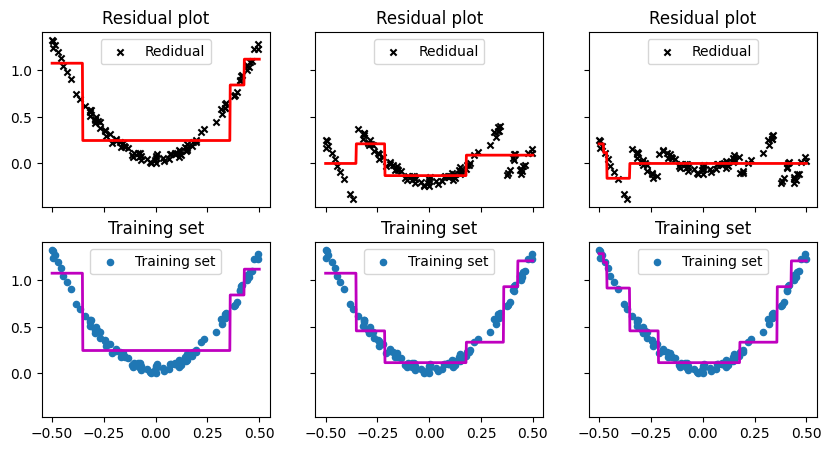

In [25]:
fig,axes=plt.subplots(2,3, sharex=True,sharey=True,figsize=(10,5))
X_test=np.linspace(-0.5,0.5,500).reshape(-1,1)
for i,h,residual in zip([0,1,2],[h1,h2,h3],[y,y2,y3]):
    ax=axes[0,i]
    y_test_pred=h.predict(X_test)
    ax.scatter(X,residual,c='k',s=20,marker='x',label='Redidual')
    ax.plot(X_test,y_test_pred,'r',linewidth=2)
    ax.set_title('Residual plot')
    ax.legend(loc='upper center')
for i, ensemble in enumerate([f1,f2,f3]):
    ax=axes[1,i]
    y_test_pred=sum(h.predict(X_test) for h in ensemble)
    ax.scatter(X,y,s=20,label='Training set')
    ax.plot(X_test,y_test_pred,'m',linewidth=2)
    ax.set_title("Training set")
    ax.legend(loc='upper center')
 
